In [ ]:
# Although no meaningful portion was copied directly, this work was made in collaboration with ChatGPT

In [2]:
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

In [3]:
df = pd.read_csv('hyperparameter_tuning_results.csv')

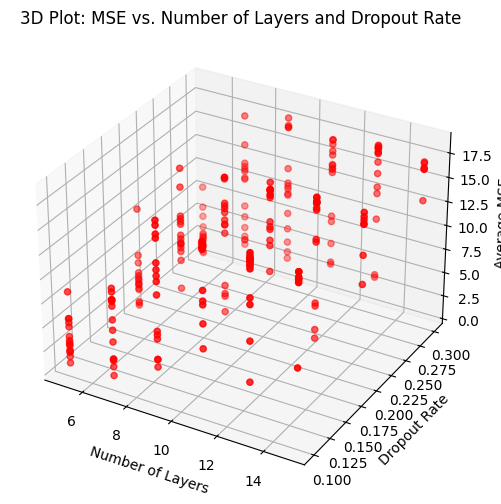

In [4]:

# 3D scatter plot of MSE vs. Number of Layers and Dropout Rate
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['Number of Layers'], df['Dropout Rate'], df['Average MSE'], c='red', marker='o')
ax.set_xlabel('Number of Layers')
ax.set_ylabel('Dropout Rate')
ax.set_zlabel('Average MSE')
ax.set_title('3D Plot: MSE vs. Number of Layers and Dropout Rate')

plt.show()


/Users/Jenny/MADS/Capstone/myenv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


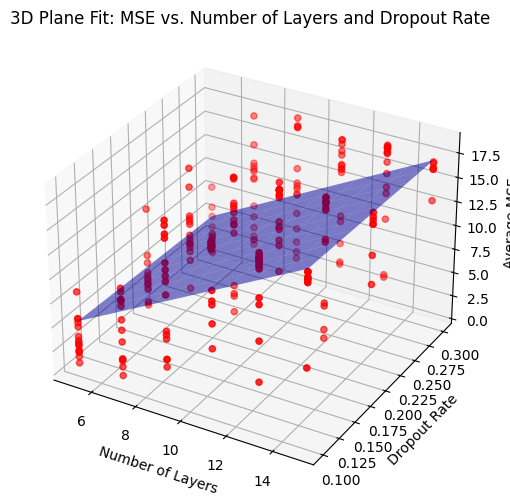

In [5]:
# Features and target for plane fitting
X = df[['Number of Layers', 'Dropout Rate']]
y = df['Average MSE']

# Fit a linear model to create a plane
model = LinearRegression()
model.fit(X, y)

# Generate a grid for the plane
x_range = np.linspace(X['Number of Layers'].min(), X['Number of Layers'].max(), 10)
y_range = np.linspace(X['Dropout Rate'].min(), X['Dropout Rate'].max(), 10)
X_mesh, Y_mesh = np.meshgrid(x_range, y_range)
Z_mesh = model.predict(np.c_[X_mesh.ravel(), Y_mesh.ravel()]).reshape(X_mesh.shape)

# Plotting
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of original data points
ax.scatter(df['Number of Layers'], df['Dropout Rate'], df['Average MSE'], color='red', label='Data Points')

# Plot the plane
ax.plot_surface(X_mesh, Y_mesh, Z_mesh, color='blue', alpha=0.5)

# Labeling
ax.set_xlabel('Number of Layers')
ax.set_ylabel('Dropout Rate')
ax.set_zlabel('Average MSE')
ax.set_title('3D Plane Fit: MSE vs. Number of Layers and Dropout Rate')

plt.show()

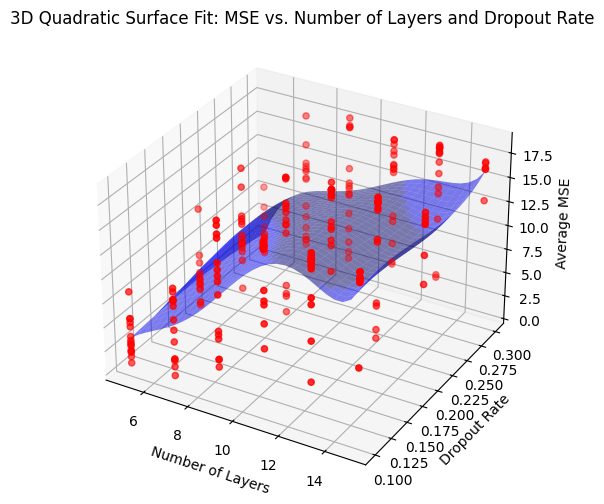

In [6]:
# Features and target for higher-order fit
X = df[['Number of Layers', 'Dropout Rate']]
y = df['Average MSE']

# Transform features to include higher-order terms
poly = PolynomialFeatures(degree=6)
X_poly = poly.fit_transform(X)

# Fit a linear model to the transformed features
model = LinearRegression()
model.fit(X_poly, y)

# Generate a grid for the higher-order surface
x_range = np.linspace(X['Number of Layers'].min(), X['Number of Layers'].max(), 30)
y_range = np.linspace(X['Dropout Rate'].min(), X['Dropout Rate'].max(), 30)
X_mesh, Y_mesh = np.meshgrid(x_range, y_range)

# Create a DataFrame for prediction to maintain feature names
mesh_df = pd.DataFrame({
    'Number of Layers': X_mesh.ravel(),
    'Dropout Rate': Y_mesh.ravel()
})
Z_mesh = model.predict(poly.transform(mesh_df)).reshape(X_mesh.shape)

# Plotting
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of original data points
ax.scatter(df['Number of Layers'], df['Dropout Rate'], df['Average MSE'], color='red', label='Data Points')

# Plot the higher-order surface
ax.plot_surface(X_mesh, Y_mesh, Z_mesh, color='blue', alpha=0.5)

# Labeling
ax.set_xlabel('Number of Layers')
ax.set_ylabel('Dropout Rate')
ax.set_zlabel('Average MSE')
ax.set_title('3D Quadratic Surface Fit: MSE vs. Number of Layers and Dropout Rate')

plt.show()


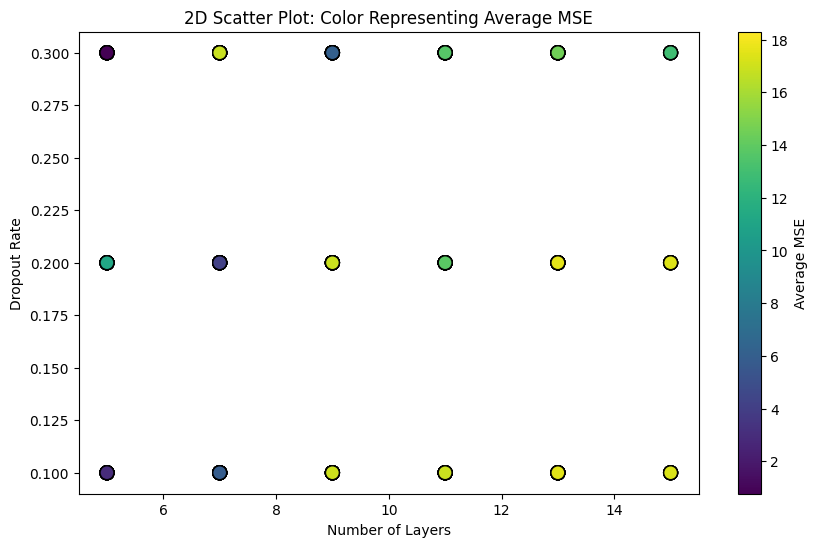

In [7]:
# 2D scatter plot with color representing Average MSE
plt.figure(figsize=(10, 6))
sc = plt.scatter(df['Number of Layers'], df['Dropout Rate'], c=df['Average MSE'], cmap='viridis', s=100, edgecolor='k')

# Adding a color bar
cbar = plt.colorbar(sc)
cbar.set_label('Average MSE')

# Labeling
plt.xlabel('Number of Layers')
plt.ylabel('Dropout Rate')
plt.title('2D Scatter Plot: Color Representing Average MSE')

plt.show()


In [8]:
# settings with the lowest MSE 
print(df[df['Average MSE'] == df['Average MSE'].min()])

    Average MSE  Number of Layers  Number of Nodes  Dropout Rate  Time Step
44     0.766632                 5              100           0.3         50


In [9]:
df.sort_values(by=['Average MSE'])[:20]

,Average MSE,Number of Layers,Number of Nodes,Dropout Rate,Time Step
44,0.766632,5,100,0.3,50
26,0.895739,5,100,0.3,30
16,0.923359,5,100,0.2,20
33,0.937290,5,100,0.1,40
84,1.080437,7,75,0.1,50
28,1.163490,5,50,0.2,40
25,1.303347,5,100,0.2,30
32,1.445489,5,75,0.3,40
2,1.561780,5,50,0.3,10
21,1.604481,5,75,0.1,30


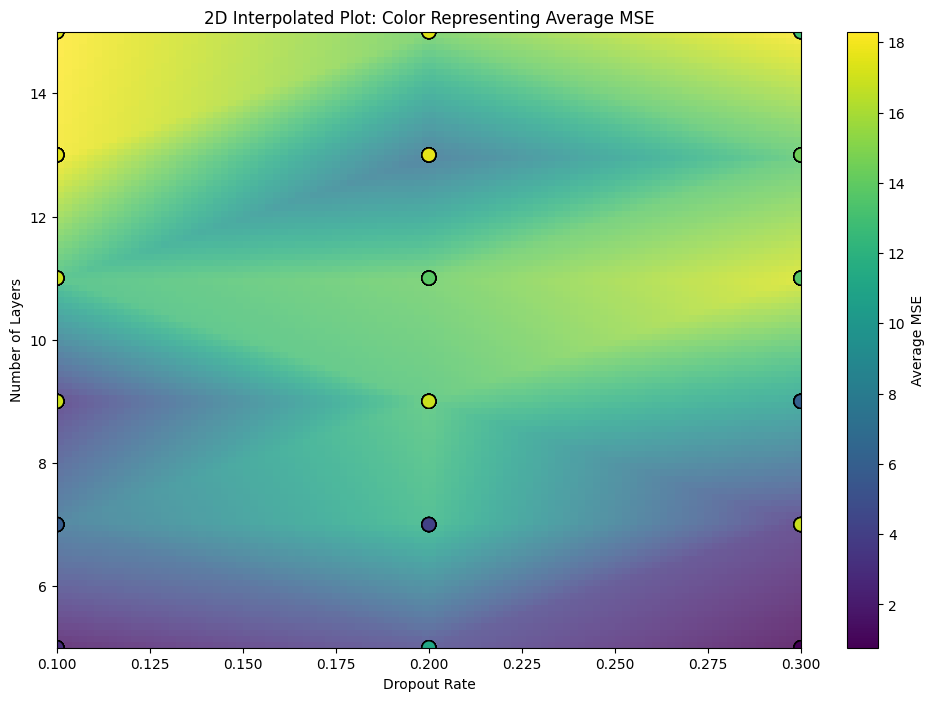

In [14]:
X_variable = 'Dropout Rate'
Y_variable = 'Number of Layers'


# Generate a grid for interpolation
x_range = np.linspace(df[X_variable].min(), df[X_variable].max(), 100)
y_range = np.linspace(df[Y_variable].min(), df[Y_variable].max(), 100)
X_mesh, Y_mesh = np.meshgrid(x_range, y_range)

# Perform 2D interpolation
Z_mesh = griddata(
    points=(df[X_variable], df[Y_variable]),
    values=df['Average MSE'],
    xi=(X_mesh, Y_mesh),
    method='linear'  
)

# Plotting the interpolated surface as a background
plt.figure(figsize=(12, 8))
plt.imshow(Z_mesh, extent=(x_range.min(), x_range.max(), y_range.min(), y_range.max()),
           origin='lower', cmap='viridis', alpha=0.8, aspect='auto')

# Overlay scatter plot of original data points
plt.scatter(df[X_variable], df[Y_variable], c=df['Average MSE'], cmap='viridis', edgecolor='k', s=100)

# Adding a color bar
cbar = plt.colorbar()
cbar.set_label('Average MSE')

# Labeling
plt.xlabel(X_variable)
plt.ylabel(Y_variable)
plt.title('2D Interpolated Plot: Color Representing Average MSE')

plt.show()